## Observations and Insights 

In [106]:
'''
Three Observations:
1. Ramicane and Capomulin appeared to be the most effective drugs for reducing tumor size
2. Capomulin and Ramicane have the smallest SEM, standard devation, and variance.
3. Mice survived longer with Ramicane and Capomulin than other drugs.
'''

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID', 'Mouse ID'])
# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [107]:
# Checking the number of mice.
total_mice = len(mouse_df['Mouse ID'].unique())
total_mice

249

In [108]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicated_mouse_df = [str(x) for x in mouse_df.iloc[1,:]]
# duplicated_mouse_df = total_mice['Mouse ID', 'Timepoint'].duplicated()
# duplicated_mouse_df
unique_time_mouse = []
for i in range(0,len(mouse_df)):
    temp_ID = mouse_df.iloc[i, 0]
    temp_TP = mouse_df.iloc[i, 1]
    temp = [temp_ID, temp_TP]
    if temp in unique_time_mouse:
        print(temp_ID)
    else:
        unique_time_mouse.append(temp)

g989
g989
g989
g989
g989


In [109]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_df = mouse_df.loc[mouse_df['Mouse ID'] == 'g989']
duplicate_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [111]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_df['Mouse ID'].unique())
total_mice

248

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = clean_df.groupby(by = 'Drug Regimen').mean()
mean_df = mean_df['Tumor Volume (mm3)']
mean_df = mean_df.rename('Mean')

median_df = clean_df.groupby(by = 'Drug Regimen').median()
median_df = median_df['Tumor Volume (mm3)']
median_df = median_df.rename('Median')

var_df = clean_df.groupby(by = 'Drug Regimen').var()
var_df = var_df['Tumor Volume (mm3)']
var_df = var_df.rename('Varience')

std_df = np.sqrt(var_df)
std_df = std_df.rename('Standard Deviation')

sem_df = std_df / np.sqrt(total_mice)
sem_df = sem_df.rename('Standard Error')

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.merge(mean_df, median_df, on = 'Drug Regimen')
summary_stats_df = pd.merge(summary_stats_df, var_df, on = 'Drug Regimen')
summary_stats_df = pd.merge(summary_stats_df, std_df, on = 'Drug Regimen')
summary_stats_df = pd.merge(summary_stats_df, sem_df, on = 'Drug Regimen')

summary_stats_df



,Mean,Median,Varience,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.317168
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.398030
Infubinol,52.884795,51.820584,43.128684,6.567243,0.417020
Ketapril,55.235638,53.698743,68.553577,8.279709,0.525762
Naftisol,54.331565,52.509285,66.173479,8.134708,0.516554
Placebo,54.033581,52.288934,61.168083,7.821003,0.496634
Propriva,52.320930,50.446266,43.852013,6.622085,0.420503
Ramicane,40.216745,40.673236,23.486704,4.846308,0.307741
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.489612


In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

for treatments in clean_df['Drug Regimen'].unique():
    agg_df = clean_df[clean_df['Drug Regimen'] == treatments]
    
    agg_df = agg_df.agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
agg_df['Tumor Volume (mm3)']

mean      52.591172
median    51.776157
var       39.290177
std        6.268188
sem        0.469821
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

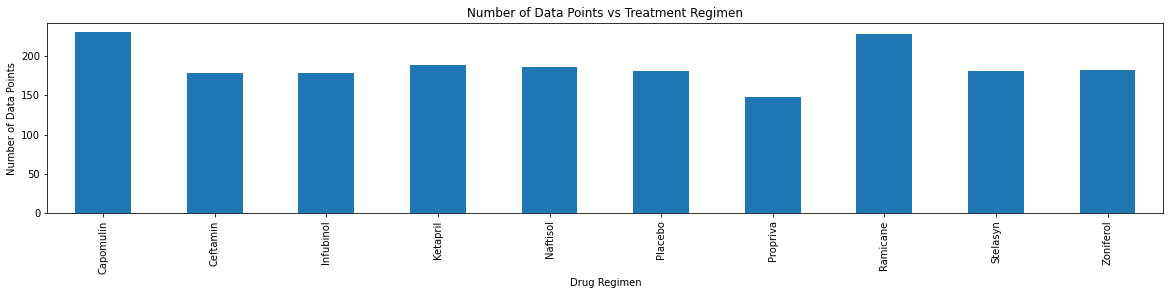

In [114]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_gb = clean_df.groupby('Drug Regimen').count()
count_df = count_gb['Mouse ID']
count_df.plot(kind='bar', figsize=(20,3.5))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Treatment Regimen')
plt.show()

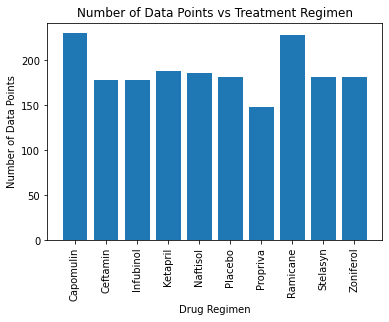

In [115]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_gb = clean_df.groupby('Drug Regimen').count()
count_df = count_gb['Mouse ID']
x_axis = np.arange(len(count_df))
plt.bar(x_axis, count_df)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_df.index, rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Treatment Regimen')
plt.show()

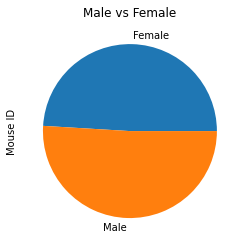

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_gb = clean_df.groupby('Sex').count()
gender_df = gender_gb['Mouse ID']
gender_df.plot(kind = 'pie', title = 'Male vs Female')
plt.show()


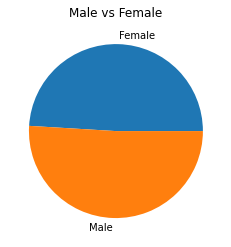

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_gb = clean_df.groupby('Sex').count()
gender_df = gender_gb['Mouse ID']
labels = ['Female', 'Male']
size = gender_df

plt.pie(size, labels = labels)
plt.title('Male vs Female')
plt.show()


## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_max_df = pd.DataFrame(capomulin_max)
capomulin_max_merge = pd.merge(capomulin_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")

ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max_df = pd.DataFrame(ramicane_max)
ramicane_max_merge = pd.merge(ramicane_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")

infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max_df = pd.DataFrame(infubinol_max)
infubinol_max_merge = pd.merge(infubinol_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")

ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max_df = pd.DataFrame(ceftamin_max)
ceftamin_max_merge = pd.merge(ceftamin_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")

In [120]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = capomulin_max_merge["Tumor Volume (mm3)"]

capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Capomulin potential outliers could include values below {capomulin_lower_bound} and above {capomulin_upper_bound}.")

 
ramicane_df = ramicane_max_merge["Tumor Volume (mm3)"]

ramicane_quartiles = ramicane_tumors.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Ramicane potential outliers could include values below {ramicane_lower_bound} and above {ramicane_upper_bound}.")


infubinol_df = infubinol_max_merge["Tumor Volume (mm3)"]

infubinol_quartiles = infubinol_tumors.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Infubinol potential outliers could include values below {infubinol_lower_bound} and above {infubinol_upper_bound}.")


ceftamin_df = ceftamin_max_merge["Tumor Volume (mm3)"]

ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin potential outliers could be values below {ceftamin_lower_bound} and above {ceftamin_upper_bound}.")
    

Capomulin potential outliers could include values below 20.70456164999999 and above 51.83201549.
Ramicane potential outliers could include values below 17.912664470000003 and above 54.30681135.
Infubinol potential outliers could include values below 36.83290494999999 and above 82.74144559000001.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999.


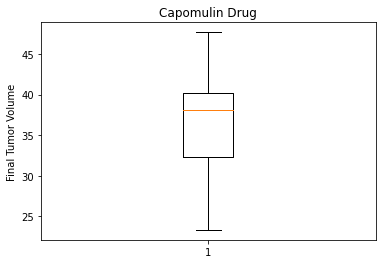

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin final tumor volume
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(capomulin_df)
plt.show()

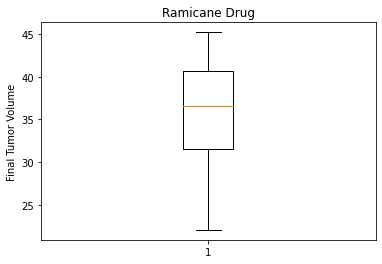

In [122]:
#Ramicane final tumor volume 
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ramicane_df)
plt.show()

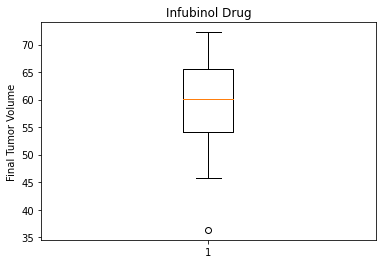

In [123]:
#Infubinol final tumor volume
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(infubinol_df)
plt.show()

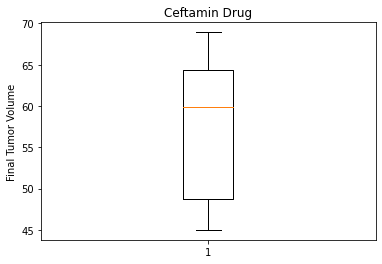

In [124]:
#Ceftamin final tumor volume
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ceftamin_df)
plt.show()

## Line and Scatter Plots

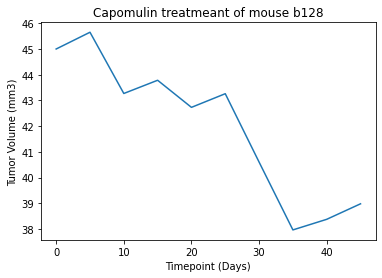

In [125]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df['Mouse ID'] == 'b128']
x_values = line_df['Timepoint']
y_values = line_df['Tumor Volume (mm3)']

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_values,y_values)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


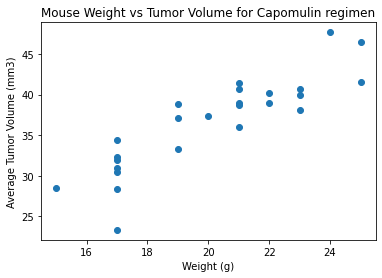

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df_mean = capomulin_max_merge.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_max_merge['Weight (g)'],capomulin_max_merge['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume for Capomulin regimen')
plt.show()


## Correlation and Regression

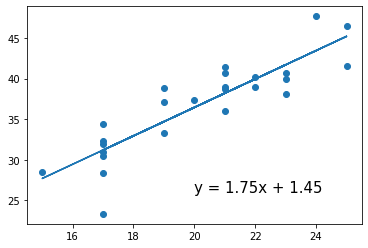

r = 0.8767060403658119


In [133]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df_mean['Weight (g)'], capomulin_df_mean['Tumor Volume (mm3)'])
regress_values = capomulin_df_mean['Weight (g)'] * slope + intercept

plt.scatter(capomulin_df_mean['Weight (g)'],capomulin_df_mean['Tumor Volume (mm3)'])

plt.plot(capomulin_df_mean['Weight (g)'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,26),fontsize=15)
             
plt.show()
print(f'r = {rvalue}')
